MAE: 0.04
R² Score: 1.00


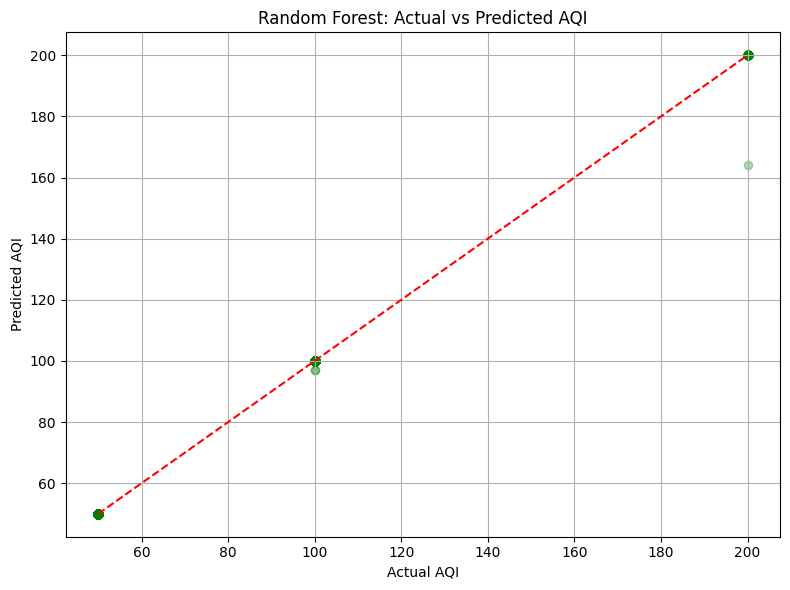

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("AQI_dataset.csv")

# Select features and target
features = ['Temperature_C', 'Humidity_%', 'AOD', 'Fires_Nearby', 'PM2.5', 'CO']
target = 'AQI'
X = df[features]
y = df[target]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Plotting Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Random Forest: Actual vs Predicted AQI')
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
test_point = pd.DataFrame([{
    "Temperature_C": 32.0,
    "Humidity_%": 59.0,
    "AOD": 0.4,
    "Fires_Nearby": 0,
    "PM2.5": 24.0,  
    "CO": 401
}])

predicted_aqi = model.predict(test_point)
print(predicted_aqi)


[50.]


In [3]:
import random
import pandas as pd

# Generate 5000 random coordinates within the bounding box of India
def generate_random_coords(n):
    coords = []
    for _ in range(n):
        lat = random.uniform(8.0, 37.0)     # Latitude range for India
        lon = random.uniform(68.0, 97.0)    # Longitude range for India
        coords.append((lat, lon))
    return coords

# Generate 5000 city points
num_points = 100000
points = generate_random_coords(num_points)

# Convert to DataFrame for export or GEE FeatureCollection format
df = pd.DataFrame(points, columns=["Latitude", "Longitude"])
df["name"] = [f"Point_{i}" for i in range(num_points)]
df[".geo"] = df.apply(lambda row: f'{{"type":"Point","coordinates":[{row["Longitude"]},{row["Latitude"]}]}}', axis=1)

df.head()

csv_path = "India_100000.csv"
df.to_csv(csv_path, index=False)
csv_path


'India_100000.csv'

In [7]:
import pandas as pd

# Load the CSV
df = pd.read_csv("Real_data_10000.csv")

# Drop 'system:index' and '.geo'
df = df.drop(columns=["system:index", ".geo"])

# Save the cleaned CSV
df.to_csv("Cleaned_10000_Environmental_Data.csv", index=False)


In [16]:
import pandas as pd
from geopy.geocoders import Nominatim
from time import sleep

# Load your CSV
df = pd.read_csv("Cleaned_data.csv")

# Initialize geocoder
geolocator = Nominatim(user_agent="geoapi")

# Function to get place name
def get_location(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), language='en')
        return location.raw['address'].get('city') or \
               location.raw['address'].get('town') or \
               location.raw['address'].get('village') or \
               location.raw['address'].get('state_district') or \
               location.raw['address'].get('state')
    except:
        return None

# Apply function (with delay to avoid rate limit)
df["Place"] = df.apply(lambda row: get_location(row["Latitude"], row["Longitude"]), axis=1)
    # Optional: add `sleep(1)` to respect usage limits if needed

# Save updated file
df.to_csv("5000_data.csv", index=False)
